In [7]:
# Groq API Configuration

import os 
from dotenv import load_dotenv
load_dotenv()

GROQ_API_KEY = os.getenv("GROQ_API_KEY")

#### Load the model

In [12]:
from langchain_groq import ChatGroq

model="deepseek-r1-distill-llama-70b"
llm= ChatGroq(model=model)

In [13]:
llm.invoke("Hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.074164628, 'prompt_time': 5.6739e-05, 'queue_time': 0.053678621, 'total_time': 0.074221367}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--3a3e522f-7240-4cd6-9809-1ba3ac92f692-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [14]:
llm.invoke("Hi").content

'<think>\n\n</think>\n\nHello! How can I assist you today?'

In [15]:
print(llm.invoke("Hi").content)

<think>

</think>

Hello! How can I assist you today?


#### import all module

In [20]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [23]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [29]:
# messages passes as string
HumanMessage("Hi, How are you?")

HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={})

In [43]:
# messages passes as list

HumanMessage(["Hi, How are you?"])

HumanMessage(content=['Hi, How are you?'], additional_kwargs={}, response_metadata={})

#### This code is only for the testing

In [44]:
state= {"messages": ["Hi, How are you?"]}
state

{'messages': ['Hi, How are you?']}

In [45]:
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.216688977, 'prompt_time': 0.000387163, 'queue_time': 0.057833896999999995, 'total_time': 0.21707614}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--1d905b43-8049-413c-8788-69c49d76a57a-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [40]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

In [63]:
from langgraph.graph import StateGraph, MessagesState, START, END

In [82]:
workflow= StateGraph(MessagesState)

In [83]:
workflow.add_node("mybot", call_model)

In [86]:
workflow.add_edge(START, "mybot")

In [87]:
workflow.add_edge("mybot", END)

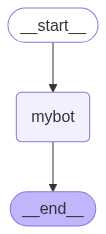

In [88]:
workflow.compile()

In [89]:
app= workflow.compile()

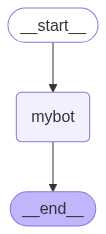

In [91]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [93]:
input= {"messages": ["Hi, How are you?"]}

In [94]:
app.invoke(input)

{'messages': [HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={}, id='c570a6ca-6668-4122-a20e-5f80588006ac'),
  AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.196257664, 'prompt_time': 0.000189157, 'queue_time': 0.056589982999999996, 'total_time': 0.196446821}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--ea66d843-8878-4d67-a2cd-2146513e1fda-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [105]:
for output in app.stream(input):
    for key, value in output.items():
        print(f"Output from {key} Node")
        print("___________")
        print(value)

Output from mybot Node
___________
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.208920032, 'prompt_time': 0.000522312, 'queue_time': 0.055930538, 'total_time': 0.209442344}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--36595e09-7927-4dfc-a9f9-d8a1c36f44b9-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}


In [100]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.204652875, 'prompt_time': 0.000214887, 'queue_time': 0.057381708000000003, 'total_time': 0.204867762}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--fb6d1710-1505-4278-a227-5414707ec7a4-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




In [95]:
app.invoke({"messages": ["What is AgenticAI?"]})

{'messages': [HumanMessage(content='What is AgenticAI?', additional_kwargs={}, response_metadata={}, id='372df89a-76f4-41f9-85e1-b18b24b152e7'),
  AIMessage(content="<think>\n\n</think>\n\nAgenticAI is a company that specializes in developing AI-driven solutions to help organizations manage and optimize their supply chains. The company uses advanced algorithms and machine learning techniques to provide predictive analytics, demand forecasting, and inventory optimization. AgenticAI's platform is designed to help businesses make data-driven decisions, reduce costs, and improve operational efficiency.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 9, 'total_tokens': 81, 'completion_time': 0.326203122, 'prompt_time': 0.001403236, 'queue_time': 0.056493324, 'total_time': 0.327606358}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f3cced25-5378-4c